## Binary Classification: Breast Cancer Wisconsin Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

** Dataset Information: **

characteristics of the cell nuclei from a digitized image of a fine needle aspirate (FNA) of a breast mass (total 569 instances). 

** Attribute Information: (30 features and 1 class)**

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3-32) 

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

** Objective of this project **

predict whether a patient's breast tumor is malignant or benign (class; M or B) based on cell nuclei characteristics (features)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url,header=None)

In [3]:
# Inspect Data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [10]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df[1].value_counts() #imbalanced classes-->stratify

B    357
M    212
Name: 1, dtype: int64

In [12]:
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

## Data preprocessing

In [6]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [7]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values
print(X.shape,y.shape)

(569, 30) (569,)


** Split Train Test Sets **

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [9]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array(['B', 'M'], dtype=object), array([285, 170], dtype=int64))

** Scale features **

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [11]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [12]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 97.8% +/- 2.6%
LDA: 95.2% +/- 3.4%
KNN: 97.4% +/- 1.3%
NB: 93.9% +/- 3.4%
DT: 92.3% +/- 4.1%
SVM: 97.4% +/- 2.4%
RF: 95.0% +/- 4.7%
XGB: 96.5% +/- 3.1%


Text(0,0.5,'Accuracy')

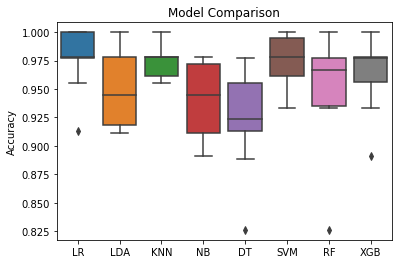

In [14]:
# cross validation
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))
# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve top 4 algorithms: LR, KNN, SVM, XGB

#### Model 1: Logistic Regression

In [22]:
# Default
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 96.5%


In [23]:
# Grid Search
model = LogisticRegression()

# parameters
penalty = ['l1','l2'] 
C = [1.0, 0.5, 0.2, 0.1, 0.05, 0.01]
param_grid = dict(penalty=penalty, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.975824 (0.026761) with: {'C': 1.0, 'penalty': 'l1'}
0.978022 (0.025905) with: {'C': 1.0, 'penalty': 'l2'}
0.978022 (0.025905) with: {'C': 0.5, 'penalty': 'l1'}
0.984615 (0.022054) with: {'C': 0.5, 'penalty': 'l2'}
0.973626 (0.030772) with: {'C': 0.2, 'penalty': 'l1'}
0.982418 (0.021487) with: {'C': 0.2, 'penalty': 'l2'}
0.971429 (0.024058) with: {'C': 0.1, 'penalty': 'l1'}
0.982418 (0.021487) with: {'C': 0.1, 'penalty': 'l2'}
0.967033 (0.036827) with: {'C': 0.05, 'penalty': 'l1'}
0.982418 (0.021487) with: {'C': 0.05, 'penalty': 'l2'}
0.934066 (0.034966) with: {'C': 0.01, 'penalty': 'l1'}
0.978022 (0.019498) with: {'C': 0.01, 'penalty': 'l2'}


Best accuracy of training set: 98.5% using {'C': 0.5, 'penalty': 'l2'}
Accuracy of test set: 96.5%


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished


#### Model 2: K-Nearest Neighbors

In [24]:
# Default
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Accuracy of test set: 94.7%


In [26]:
# Grid Search
model = KNeighborsClassifier()

# parameters
n_neighbors = [4,5,6,7,8]
param_grid = dict(n_neighbors=n_neighbors)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.969231 (0.022417) with: {'n_neighbors': 4}
0.973626 (0.013231) with: {'n_neighbors': 5}
0.964835 (0.024565) with: {'n_neighbors': 6}
0.971429 (0.017216) with: {'n_neighbors': 7}
0.962637 (0.028034) with: {'n_neighbors': 8}


Best accuracy of training set: 97.4% using {'n_neighbors': 5}
Accuracy of test set: 94.7%


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


#### Model 3: Support Vector Machine

In [27]:
# Default
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy of test set: 94.7%


In [34]:
# Grid Search
model = SVC(kernel='rbf')

# parameters
C = [100.0, 10.0, 1.0, 0.1]
gamma = [1.0, 0.1, 0.05, 0.01,0.001]
param_grid = dict(gamma=gamma, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.630769 (0.007663) with: {'C': 100.0, 'gamma': 1.0}
0.951648 (0.032192) with: {'C': 100.0, 'gamma': 0.1}
0.953846 (0.028288) with: {'C': 100.0, 'gamma': 0.05}
0.960440 (0.030549) with: {'C': 100.0, 'gamma': 0.01}
0.982418 (0.016449) with: {'C': 100.0, 'gamma': 0.001}
0.630769 (0.007663) with: {'C': 10.0, 'gamma': 1.0}
0.947253 (0.035553) with: {'C': 10.0, 'gamma': 0.1}
0.964835 (0.029674) with: {'C': 10.0, 'gamma': 0.05}
0.984615 (0.025947) with: {'C': 10.0, 'gamma': 0.01}
0.982418 (0.016449) with: {'C': 10.0, 'gamma': 0.001}
0.630769 (0.007663) with: {'C': 1.0, 'gamma': 1.0}
0.960440 (0.036357) with: {'C': 1.0, 'gamma': 0.1}
0.973626 (0.029069) with: {'C': 1.0, 'gamma': 0.05}
0.975824 (0.020699) with: {'C': 1.0, 'gamma': 0.01}
0.947253 (0.029855) with: {'C': 1.0, 'gamma': 0.001}
0.626374 (0.004106) with: {'C': 0.1, 'gamma': 1.0}
0.940659 (0.039486) with: {'C': 0.1, 'gamma': 0.1}
0.945055 (0.035896) with: {'C': 0.1, 'gamma

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished


#### Model 4: XGBoost

In [36]:
# Default
model = XGBClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


Accuracy of test set: 94.7%


In [41]:
# Grid Search
model = XGBClassifier(random_state=seed)

# parameters
n_estimators = [100,200]
max_depth = [3,4,5]
learning_rate = [0.3,0.1,0.01]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, 
                  learning_rate=learning_rate)
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 18 candidates, totalling 180 fits
0.969231 (0.029638) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
0.969231 (0.029638) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}
0.971429 (0.032505) with: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100}
0.973626 (0.032106) with: {'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}
0.969231 (0.031208) with: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
0.964835 (0.029584) with: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200}
0.964835 (0.031192) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.969231 (0.020042) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.967033 (0.028037) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.975824 (0.022891) with: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
0.964835 (0.026176) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimator

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   20.8s finished


[ 0.00633914  0.07606973  0.00792393  0.02060222  0.04437401  0.0110935
  0.01426307  0.06022187  0.01267829  0.00475436  0.00633914  0.01584786
  0.00316957  0.11093502  0.00950872  0.03486529  0.00158479  0.0110935
  0.022187    0.00475436  0.022187    0.14263074  0.04912837  0.06973059
  0.06656101  0.00633914  0.06656101  0.06973059  0.022187    0.00633914]


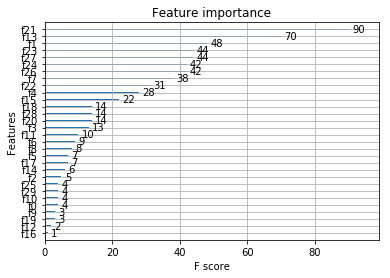

In [44]:
# Feature Importance
from xgboost import plot_importance  
model = XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=200, 
                      random_state=seed)
model.fit(X_train,y_train)
print(model.feature_importances_)
plot_importance(model)

## Final Model: SVC(C=10.0, kernel=rbf, gamma=0.01)

** Final Model **

In [15]:
model = SVC(C=10.0, kernel='rbf', gamma=0.01)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 98.9%


** Save and load the final model **

In [16]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 98.9%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          B       0.99      1.00      0.99       285
          M       0.99      0.98      0.99       170

avg / total       0.99      0.99      0.99       455



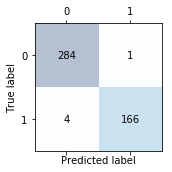

In [19]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [20]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of test set: 97.4%


             precision    recall  f1-score   support

          B       0.97      0.99      0.98        72
          M       0.98      0.95      0.96        42

avg / total       0.97      0.97      0.97       114



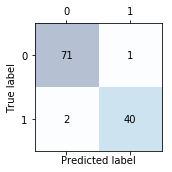

In [21]:
#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

Best model: ** Support Vector Machine (SVM) ** w/param: C=10.0, gamma=0.01

Accuracy of test set: ** 97.4% **